In [2]:
pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [25]:
df = pd.read_csv("/Users/sarabjotsingh/Downloads/balanced_dataset.csv")

In [26]:
# Set seaborn style
sns.set_style("whitegrid")

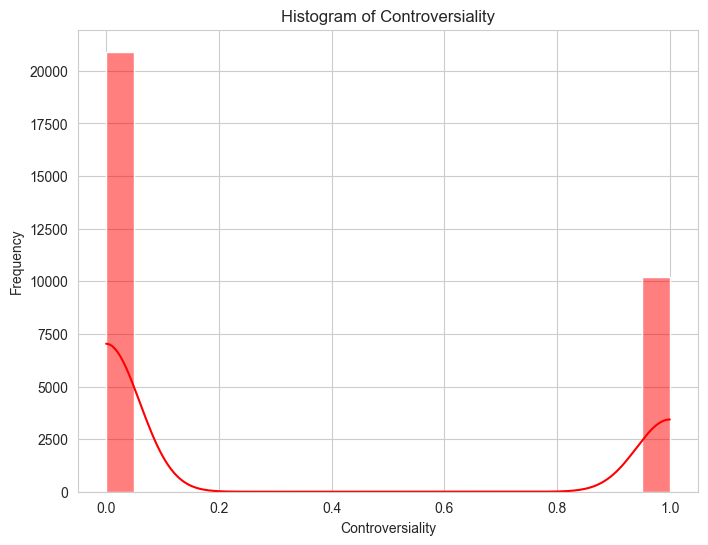

In [29]:
# 1. Histogram of Controversiality
plt.figure(figsize=(8, 6))
sns.histplot(df['controversiality'], bins=20, kde=True, color='red')
plt.title('Histogram of Controversiality')
plt.xlabel('Controversiality')
plt.ylabel('Frequency')
plt.show()

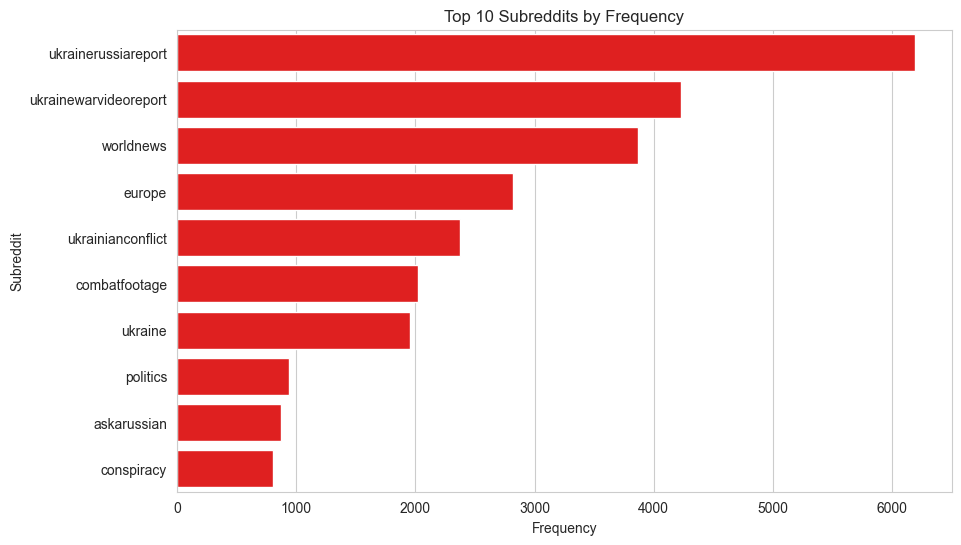

In [31]:
# 2. Bar Chart of Subreddits
plt.figure(figsize=(10, 6))
sns.countplot(y='subreddit', data=df, order=df['subreddit'].value_counts().index[:10], color='red')
plt.title('Top 10 Subreddits by Frequency')
plt.xlabel('Frequency')
plt.ylabel('Subreddit')
plt.show()

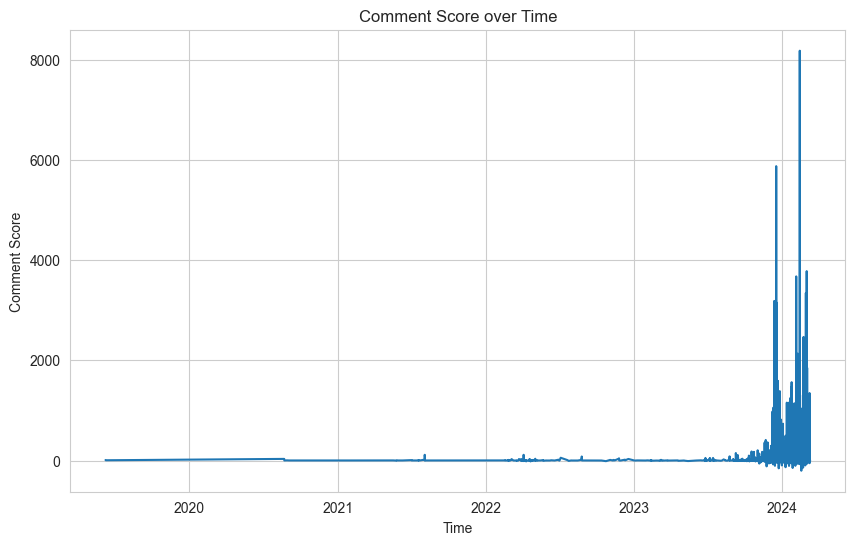

In [8]:
# 3. Line Plot of Comment Score over Time
df['created_time'] = pd.to_datetime(df['created_time'])
plt.figure(figsize=(10, 6))
sns.lineplot(x='created_time', y='score', data=df)
plt.title('Comment Score over Time')
plt.xlabel('Time')
plt.ylabel('Comment Score')
plt.show()

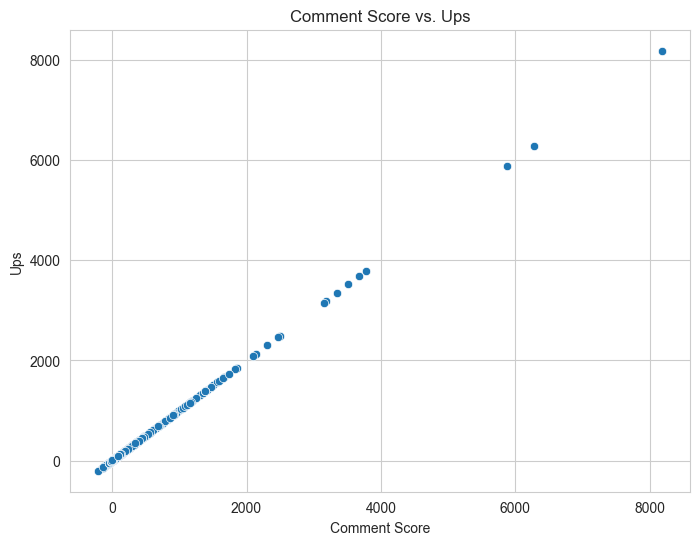

In [9]:
# 4. Scatter Plot of Comment Score vs. Ups
plt.figure(figsize=(8, 6))
sns.scatterplot(x='score', y='ups', data=df)
plt.title('Comment Score vs. Ups')
plt.xlabel('Comment Score')
plt.ylabel('Ups')
plt.show()

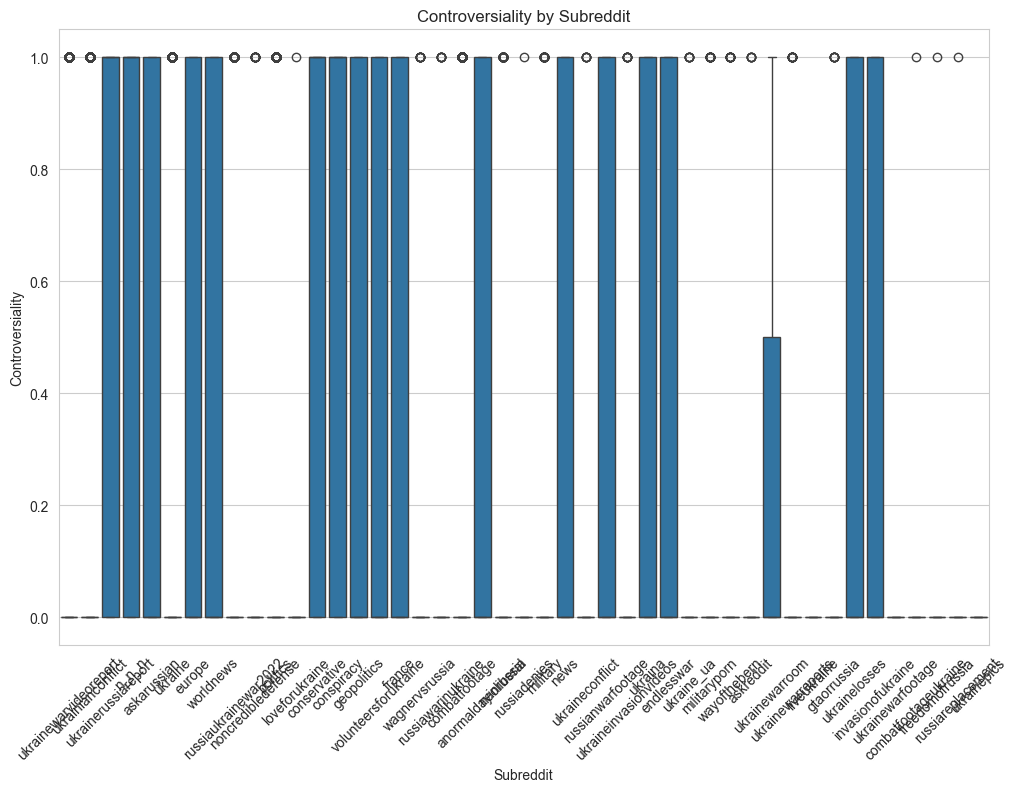

In [10]:
# 5. Box Plot of Controversiality by Subreddit
plt.figure(figsize=(12, 8))
sns.boxplot(x='subreddit', y='controversiality', data=df)
plt.title('Controversiality by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Controversiality')
plt.xticks(rotation=45)
plt.show()

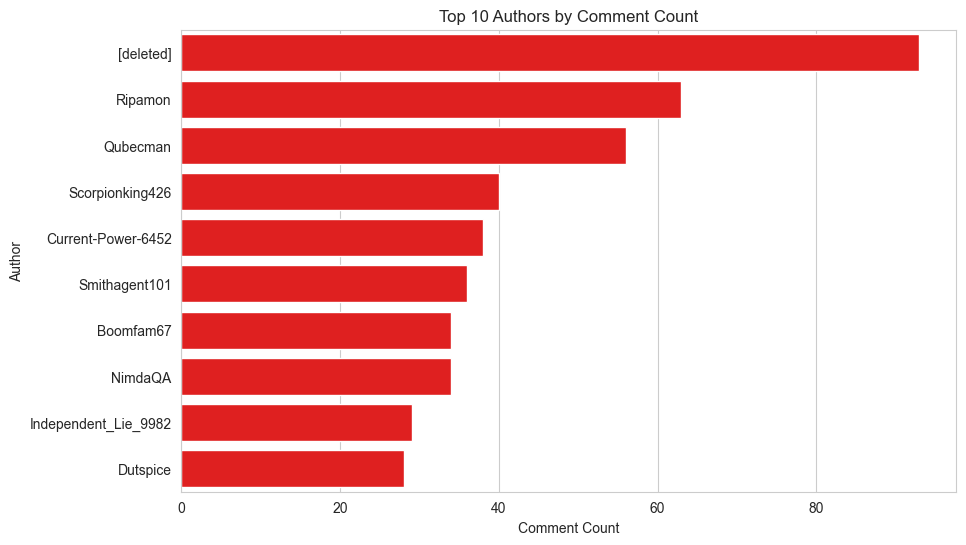

In [32]:
# 6. Bar Chart of Top Authors
plt.figure(figsize=(10, 6))
sns.countplot(y='author_name', data=df, order=df['author_name'].value_counts().index[:10], color='red')
plt.title('Top 10 Authors by Comment Count')
plt.xlabel('Comment Count')
plt.ylabel('Author')
plt.show()

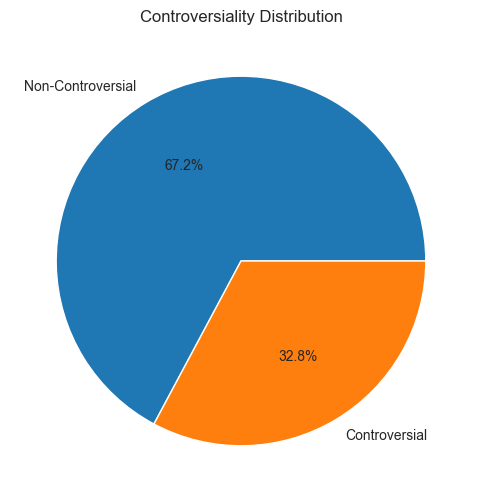

In [12]:
# 7. Pie Chart of Controversiality Distribution
plt.figure(figsize=(6, 6))
df['controversiality_label'] = df['controversiality'].apply(lambda x: 'Controversial' if x == 1 else 'Non-Controversial')
df['controversiality_label'].value_counts().plot(kind='pie', autopct='%1.1f%%')
plt.title('Controversiality Distribution')
plt.ylabel('')
plt.show()

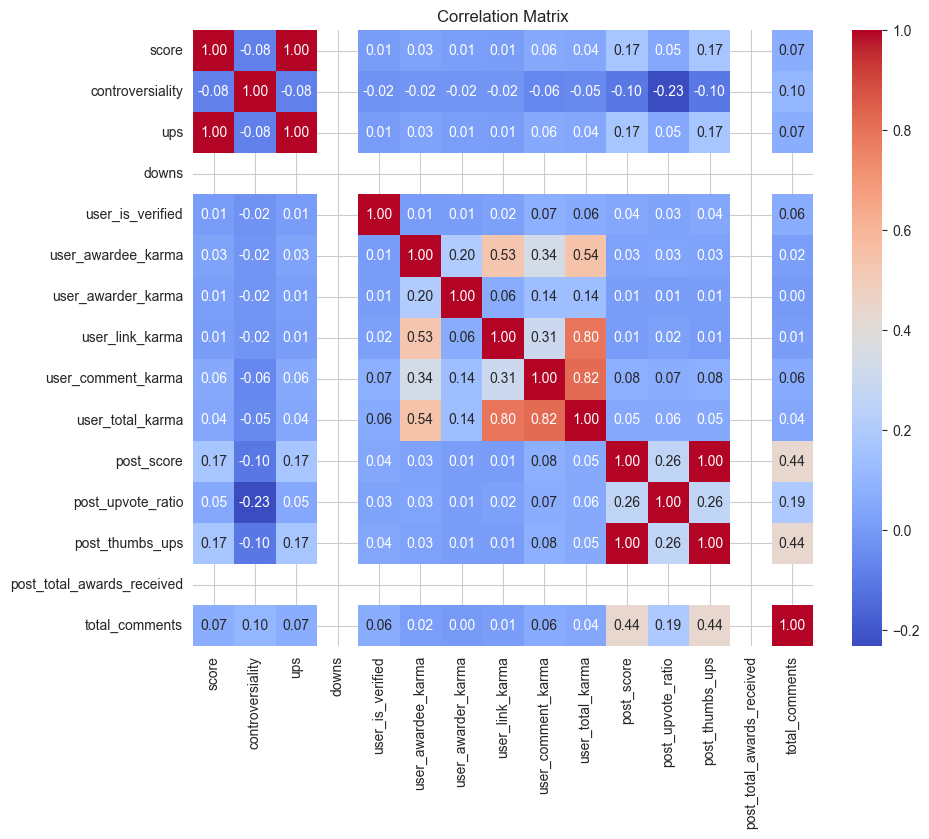

In [13]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=['int64', 'float64'])

# 8. Heatmap of Correlation Matrix
plt.figure(figsize=(10, 8))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [14]:
from wordcloud import WordCloud

# Extract controversial and non-controversial comments
controversial_comments = df[df['controversiality'] == 1]['self_text'].str.cat(sep=' ')
non_controversial_comments = df[df['controversiality'] == 0]['self_text'].str.cat(sep=' ')

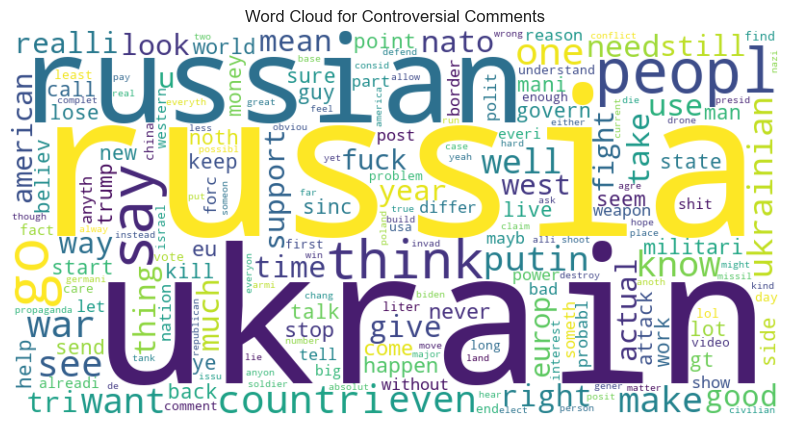

In [15]:
# Create WordCloud for controversial comments
wordcloud_controversial = WordCloud(width=800, height=400, background_color='white').generate(controversial_comments)

# Plot WordCloud for controversial comments
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_controversial, interpolation='bilinear')
plt.title('Word Cloud for Controversial Comments')
plt.axis('off')
plt.show()


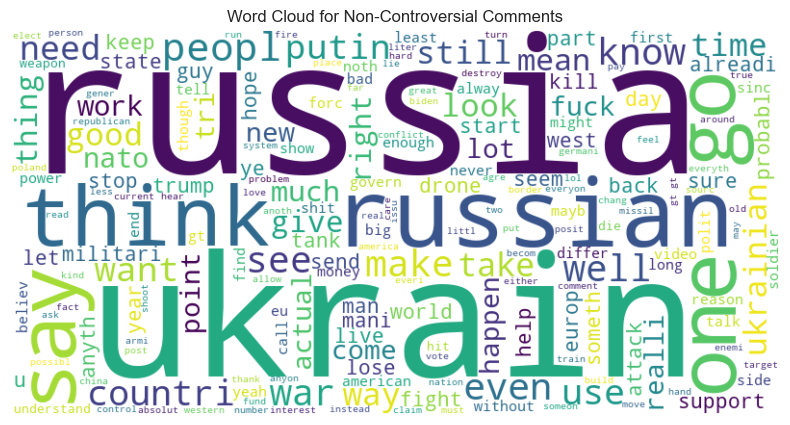

In [16]:
# Create WordCloud for non-controversial comments
wordcloud_non_controversial = WordCloud(width=800, height=400, background_color='white').generate(non_controversial_comments)


# Plot WordCloud for non-controversial comments
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_non_controversial, interpolation='bilinear')
plt.title('Word Cloud for Non-Controversial Comments')
plt.axis('off')
plt.show()


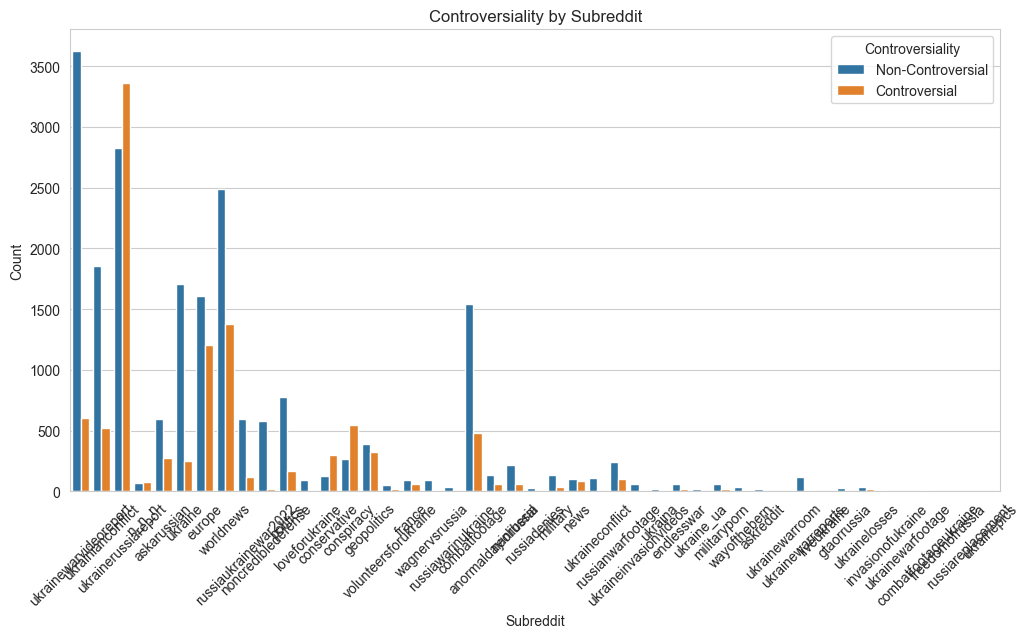

In [17]:
plt.figure(figsize=(12, 6))
sns.countplot(x='subreddit', hue='controversiality', data=df)
plt.title('Controversiality by Subreddit')
plt.xlabel('Subreddit')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Controversiality', labels=['Non-Controversial', 'Controversial'])
plt.show()

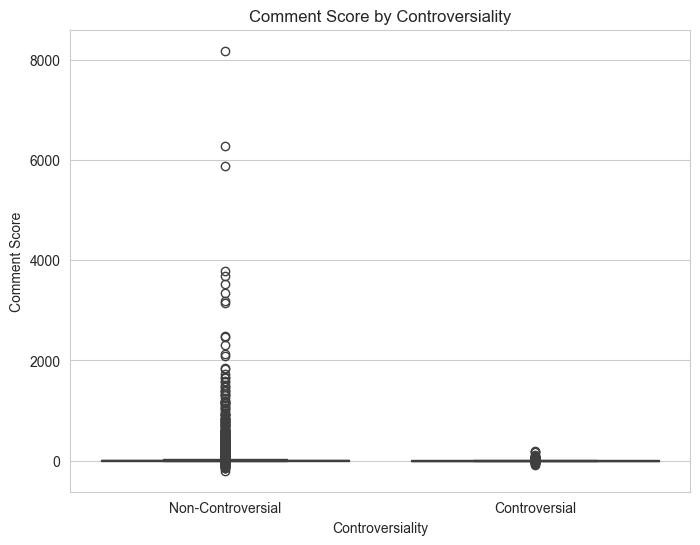

In [18]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='controversiality', y='score', data=df)
plt.title('Comment Score by Controversiality')
plt.xlabel('Controversiality')
plt.ylabel('Comment Score')
plt.xticks(ticks=[0, 1], labels=['Non-Controversial', 'Controversial'])
plt.show()


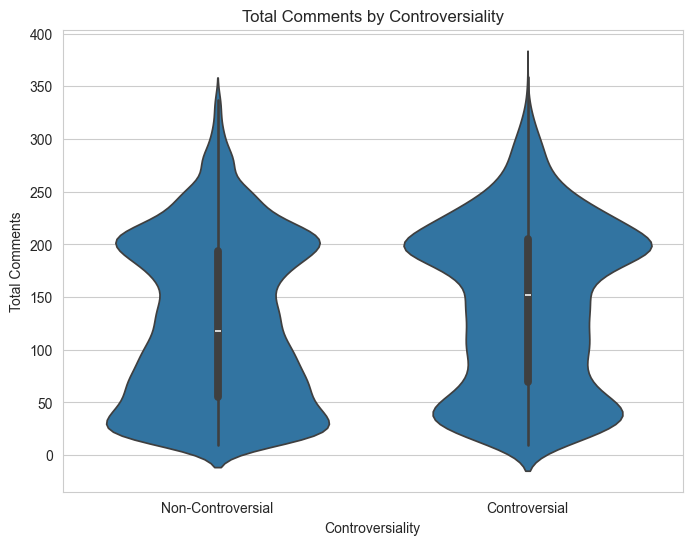

In [19]:
plt.figure(figsize=(8, 6))
sns.violinplot(x='controversiality', y='total_comments', data=df)
plt.title('Total Comments by Controversiality')
plt.xlabel('Controversiality')
plt.ylabel('Total Comments')
plt.xticks(ticks=[0, 1], labels=['Non-Controversial', 'Controversial'])
plt.show()

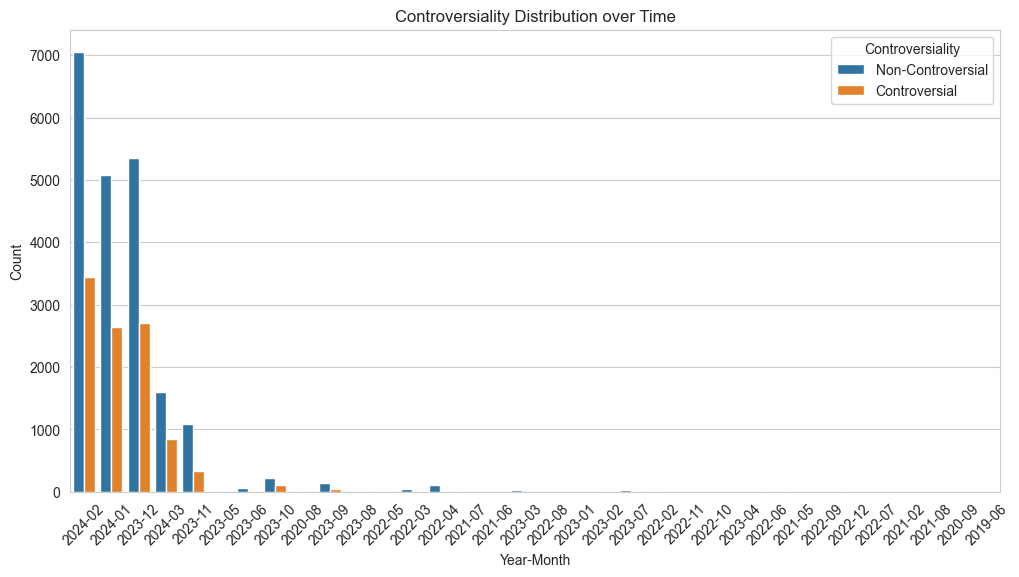

In [20]:
plt.figure(figsize=(12, 6))
df['created_time'] = pd.to_datetime(df['created_time'])
df['year_month'] = df['created_time'].dt.to_period('M')
sns.countplot(x='year_month', hue='controversiality', data=df)
plt.title('Controversiality Distribution over Time')
plt.xlabel('Year-Month')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Controversiality', labels=['Non-Controversial', 'Controversial'])
plt.show()


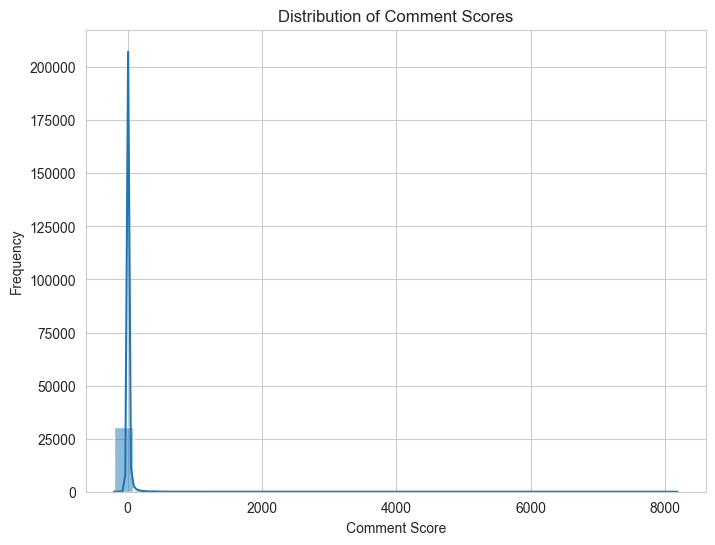

In [21]:
plt.figure(figsize=(8, 6))
sns.histplot(df['score'], bins=30, kde=True)
plt.title('Distribution of Comment Scores')
plt.xlabel('Comment Score')
plt.ylabel('Frequency')
plt.show()


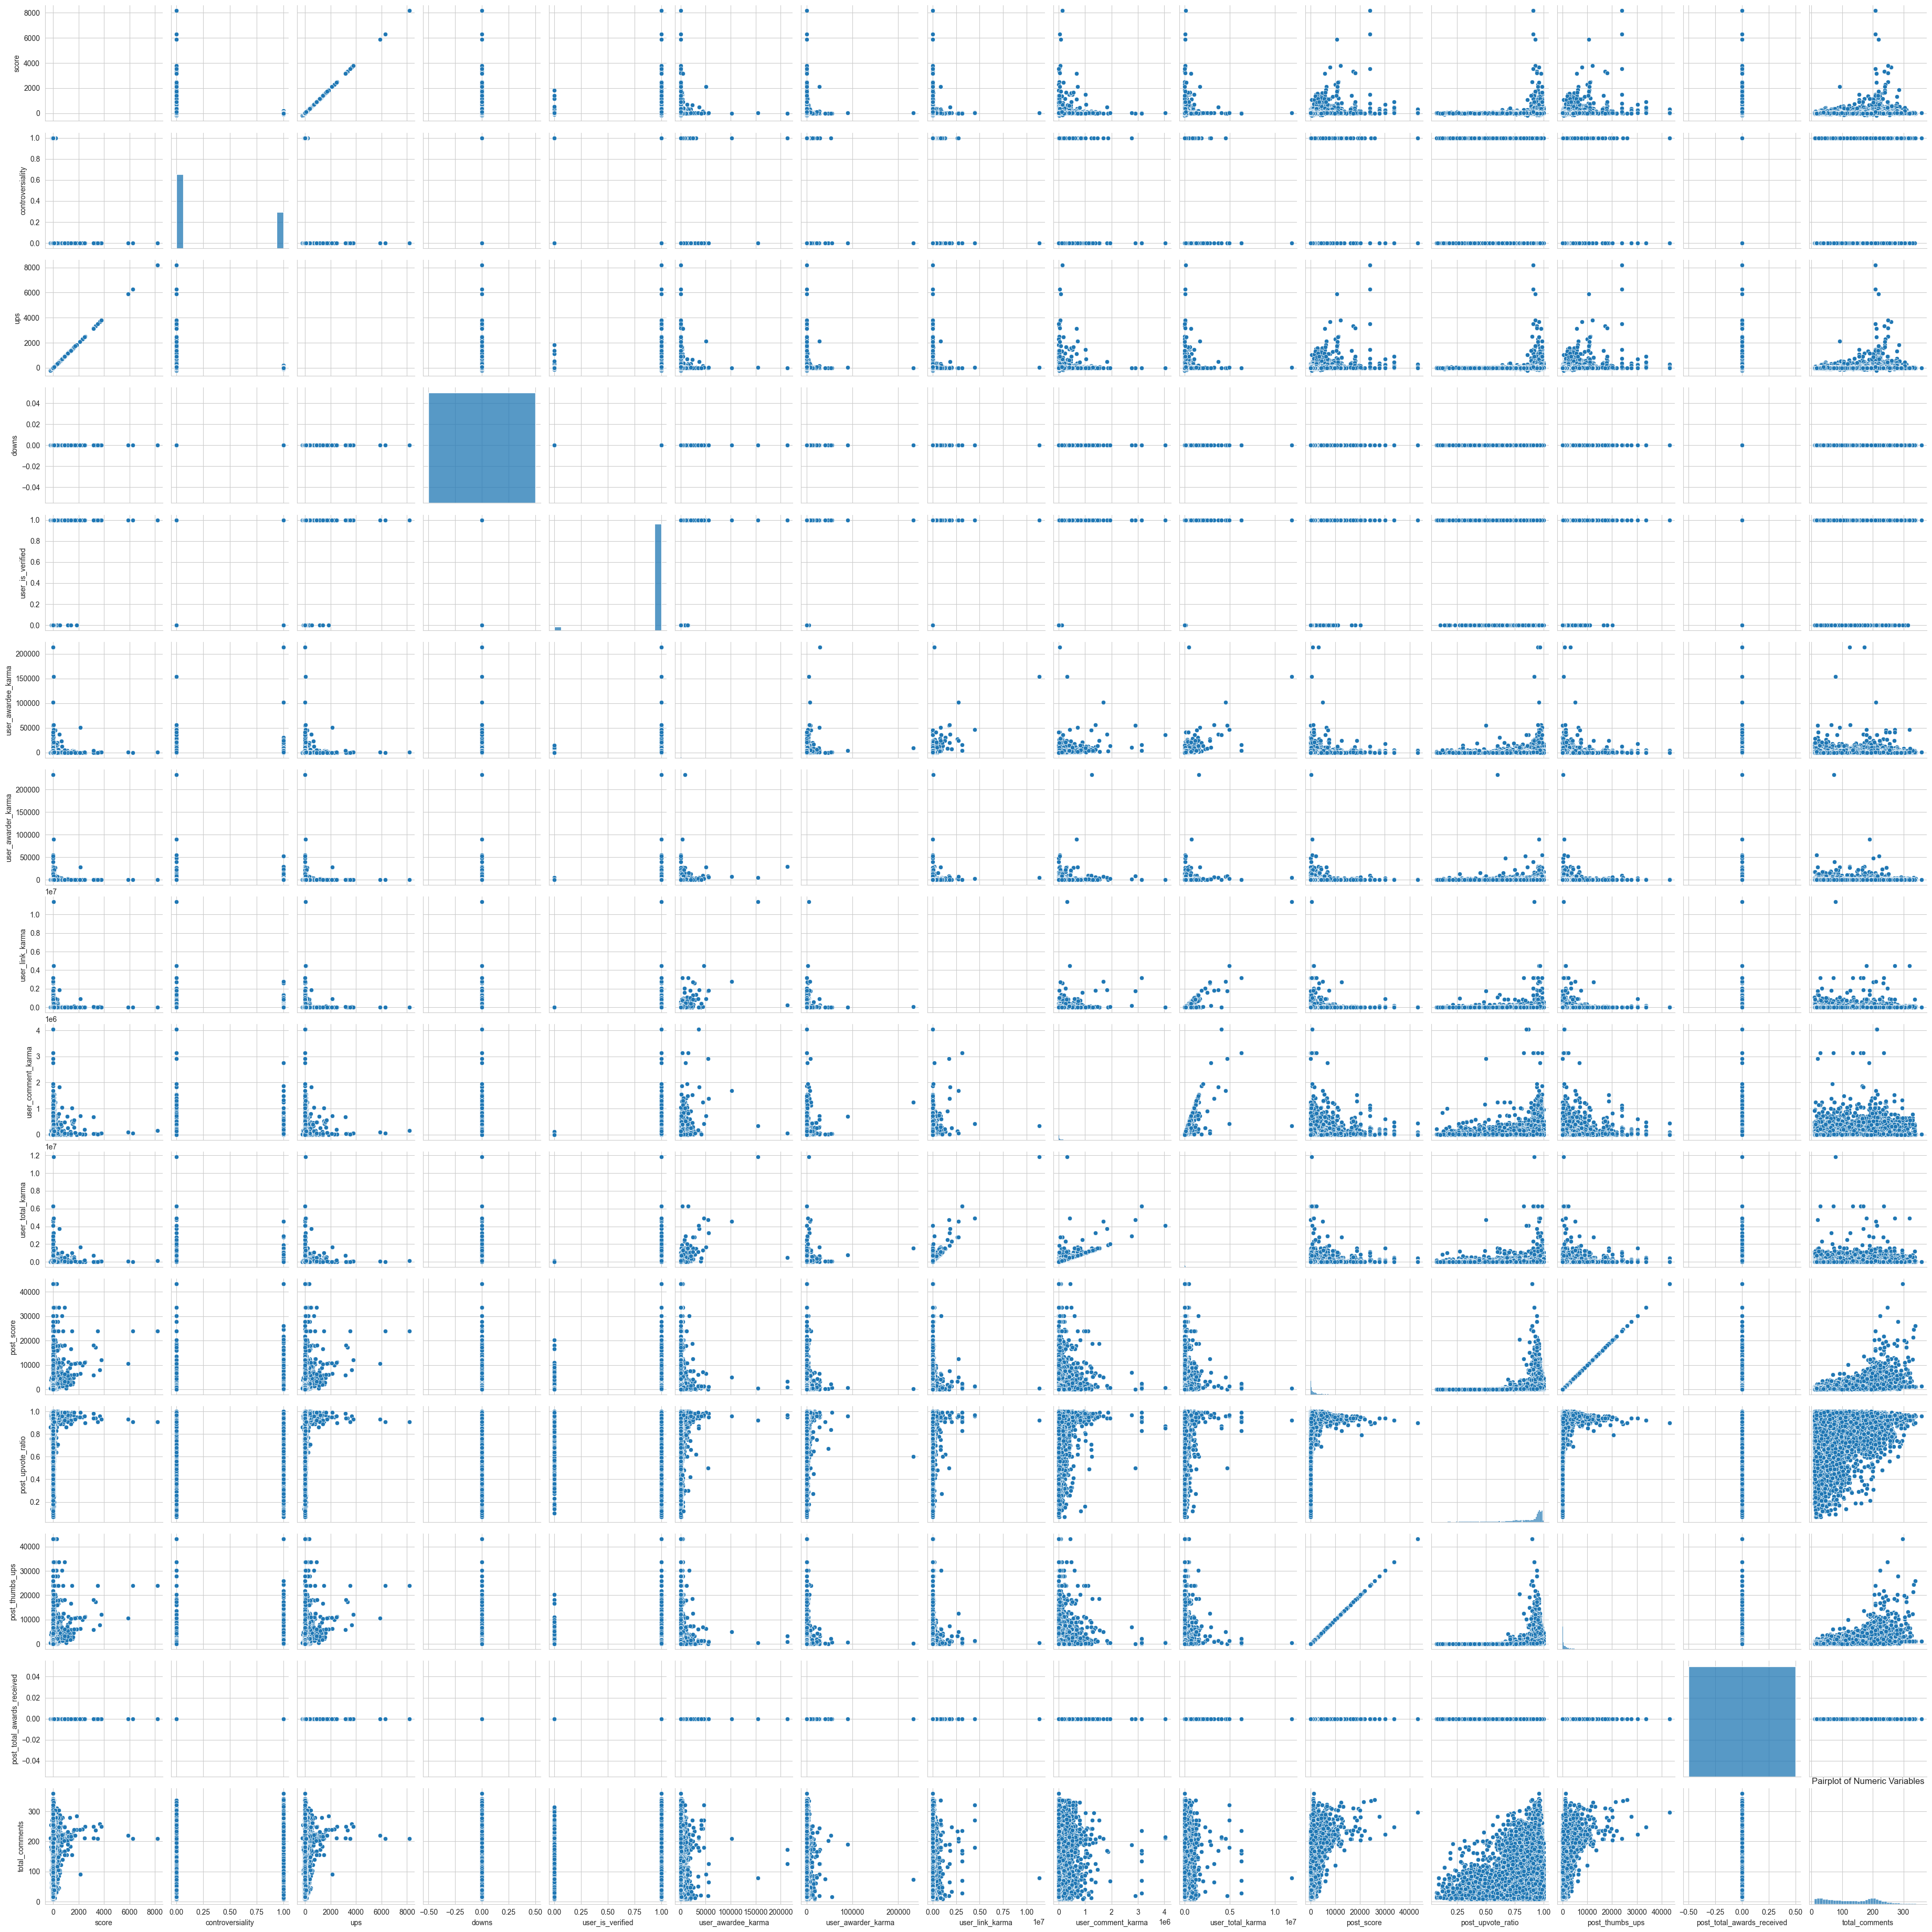

In [22]:
sns.pairplot(df.select_dtypes(include=['int64', 'float64']))
plt.title('Pairplot of Numeric Variables')
plt.show()
